<a href="https://colab.research.google.com/github/Cheney-Tsai/FiftyOne/blob/main/YOLO_V8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# YOLO v8 Â†ÜÈ´òÊ©üÂíå‰∫∫Âì°Ê™¢Ê∏¨Ë®ìÁ∑¥ V2 - Google Colab
# ÊîπÈÄ≤ÁâàÔºöÂÑ™ÂåñËß£Â£ìÁ∏ÆÊµÅÁ®ãÂíåË≥áÊñôÂ§æËôïÁêÜ
# ================================================================

# 1. ÂÆâË£ùÂøÖË¶ÅÂ•ó‰ª∂
print("Ê≠£Âú®ÂÆâË£ùÂøÖË¶ÅÂ•ó‰ª∂...")
!pip install ultralytics
!pip install roboflow

# 2. Â∞éÂÖ•ÂøÖË¶ÅÊ®°ÁµÑ
import os
import shutil
from pathlib import Path
import yaml
from ultralytics import YOLO
from google.colab import drive
import zipfile
import glob

# 3. ÊéõËºâGoogleÈõ≤Á´ØÁ°¨Á¢ü
print("ÊéõËºâGoogleÈõ≤Á´ØÁ°¨Á¢ü...")
drive.mount('/content/drive')

# 4. ÂâµÂª∫Â∑•‰ΩúÁõÆÈåÑ
work_dir = '/content/forklift_detection'
os.makedirs(work_dir, exist_ok=True)
os.chdir(work_dir)

print(f"Â∑•‰ΩúÁõÆÈåÑ: {work_dir}")

Ê≠£Âú®ÂÆâË£ùÂøÖË¶ÅÂ•ó‰ª∂...
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.0/1.0 MB 27.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 90.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 72.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 49.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [4]:
# ‚ö†Ô∏è Èõ≤Á´ØÁ°¨Á¢ü‰∏≠ÁöÑÂØ¶ÈöõË∑ØÂæë
drive_dataset_path = '/content/drive/MyDrive/Colab Notebooks/Forklift and Personal detection.v7i.yolov8.zip'

def extract_and_load_dataset(drive_path):
    """ÂæûGoogleÈõ≤Á´ØÁ°¨Á¢üËºâÂÖ•‰∏¶Ëß£Â£ìÁ∏ÆË≥áÊñôÈõÜ"""
    print(f"ÂòóË©¶ËºâÂÖ•: {drive_path}")

    if not os.path.exists(drive_path):
        print(f"‚ùå Êâæ‰∏çÂà∞Ê™îÊ°à: {drive_path}")
        return False, None

    print(f"‚úÖ ÊâæÂà∞Ë≥áÊñôÈõÜ: {drive_path}")

    # Â¶ÇÊûúÊòØÂ£ìÁ∏ÆÊ™îÔºåÂÖàËß£Â£ìÁ∏Æ
    if drive_path.endswith(('.zip', '.rar', '.7z')):
        print("üì¶ Ëß£Â£ìÁ∏ÆË≥áÊñôÈõÜ...")

        try:
            # Ê∏ÖÁêÜÁèæÊúâÁöÑËß£Â£ìÁ∏ÆÂÖßÂÆπ
            dataset_dir = './dataset'
            if os.path.exists(dataset_dir):
                shutil.rmtree(dataset_dir)

            with zipfile.ZipFile(drive_path, 'r') as zip_ref:
                # ÂàóÂá∫Â£ìÁ∏ÆÊ™îÂÖßÂÆπ
                file_list = zip_ref.namelist()
                print(f"Â£ìÁ∏ÆÊ™îÂåÖÂê´ {len(file_list)} ÂÄãÊ™îÊ°à")

                # Ëß£Â£ìÁ∏ÆÂà∞ dataset ÁõÆÈåÑ
                zip_ref.extractall('./dataset')
                print("‚úÖ Ëß£Â£ìÁ∏ÆÂÆåÊàê!")

                # Ê™¢Êü•Ëß£Â£ìÁ∏ÆÂæåÁöÑÁµêÊßã
                print("\nüìÅ Ëß£Â£ìÁ∏ÆÂæåÁöÑÁµêÊßã:")
                for root, dirs, files in os.walk('./dataset'):
                    level = root.replace('./dataset', '').count(os.sep)
                    if level < 3:  # Âè™È°ØÁ§∫Ââç3Â±§
                        indent = '  ' * level
                        folder_name = os.path.basename(root) if level > 0 else 'dataset'
                        print(f'{indent}üìÅ {folder_name}/')

                        # È°ØÁ§∫Ë≥áÊñôÂ§æÂÖßÂÆπÊ¶ÇË¶Å
                        if level < 2:
                            subindent = '  ' * (level + 1)
                            for d in dirs[:5]:
                                print(f'{subindent}üìÅ {d}/')

                            image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
                            label_files = [f for f in files if f.lower().endswith('.txt')]
                            yaml_files = [f for f in files if f.lower().endswith(('.yaml', '.yml'))]

                            if image_files:
                                print(f'{subindent}üñºÔ∏è  ÂúñÁâáÊ™îÊ°à: {len(image_files)} ÂÄã')
                            if label_files:
                                print(f'{subindent}üè∑Ô∏è  Ê®ôÁ±§Ê™îÊ°à: {len(label_files)} ÂÄã')
                            if yaml_files:
                                print(f'{subindent}‚öôÔ∏è  ÈÖçÁΩÆÊ™îÊ°à: {yaml_files}')

                # Â∞ãÊâæÂØ¶ÈöõÁöÑË≥áÊñôÈõÜÊ†πÁõÆÈåÑ
                dataset_root = find_dataset_root('./dataset')
                return True, dataset_root

        except Exception as e:
            print(f"‚ùå Ëß£Â£ìÁ∏ÆÂ§±Êïó: {e}")
            return False, None

    else:
        # Â¶ÇÊûúÊòØÁõÆÈåÑÔºåÁõ¥Êé•Ë§áË£Ω
        print("üìÅ Ë§áË£ΩË≥áÊñôÈõÜÁõÆÈåÑ...")
        try:
            if os.path.exists('./dataset'):
                shutil.rmtree('./dataset')
            shutil.copytree(drive_path, './dataset')
            dataset_root = find_dataset_root('./dataset')
            return True, dataset_root
        except Exception as e:
            print(f"‚ùå Ë§áË£ΩÂ§±Êïó: {e}")
            return False, None

def find_dataset_root(base_path):
    """Â∞ãÊâæË≥áÊñôÈõÜÁöÑÂØ¶ÈöõÊ†πÁõÆÈåÑ"""
    print("\nüîç Â∞ãÊâæË≥áÊñôÈõÜÊ†πÁõÆÈåÑ...")

    # Ê™¢Êü•Áï∂ÂâçÁõÆÈåÑÊòØÂê¶Áõ¥Êé•ÂåÖÂê´ train/valid ÁõÆÈåÑ
    if os.path.exists(os.path.join(base_path, 'train')) and os.path.exists(os.path.join(base_path, 'valid')):
        print(f"‚úÖ Ë≥áÊñôÈõÜÊ†πÁõÆÈåÑ: {base_path}")
        return base_path

    # ÈÅûÊ≠∏ÊêúÂ∞ãÂåÖÂê´ train Âíå valid ÁõÆÈåÑÁöÑË≥áÊñôÂ§æ
    for root, dirs, files in os.walk(base_path):
        if 'train' in dirs and ('valid' in dirs or 'val' in dirs):
            print(f"‚úÖ ÊâæÂà∞Ë≥áÊñôÈõÜÊ†πÁõÆÈåÑ: {root}")
            return root

    print(f"‚ö†Ô∏è  Êú™ÊâæÂà∞Ê®ôÊ∫ñÁöÑ train/valid ÁµêÊßãÔºå‰ΩøÁî®: {base_path}")
    return base_path

# ËºâÂÖ•ÂíåËß£Â£ìÁ∏ÆË≥áÊñôÈõÜ
dataset_loaded, dataset_root = extract_and_load_dataset(drive_dataset_path)

if not dataset_loaded:
    print("\n‚ùå Ë≥áÊñôÈõÜËºâÂÖ•Â§±ÊïóÔºÅ")
    print("Ë´ãÂü∑Ë°å‰ª•‰∏ãÊ≠•È©ü:")
    print("1. Â∞áÊÇ®ÁöÑË≥áÊñôÈõÜ‰∏äÂÇ≥Âà∞GoogleÈõ≤Á´ØÁ°¨Á¢ü")
    print("2. ‰øÆÊîπ‰∏äÈù¢ÁöÑ drive_dataset_path ËÆäÊï∏ÁÇ∫Ê≠£Á¢∫Ë∑ØÂæë")
    print("3. ÈáçÊñ∞Âü∑Ë°åÊ≠§Á®ãÂºèÁ¢º")
    print("\nÂ∏∏Ë¶ãË∑ØÂæëÊ†ºÂºè:")
    print("- Â£ìÁ∏ÆÊ™î: '/content/drive/MyDrive/datasets/forklift_dataset.zip'")
    print("- ÁõÆÈåÑ: '/content/drive/MyDrive/datasets/forklift_dataset'")

    # ÂàóÂá∫Èõ≤Á´ØÁ°¨Á¢üÂÖßÂÆπÂπ´Âä©ÊâæÂà∞Ê≠£Á¢∫Ë∑ØÂæë
    mydrive_path = '/content/drive/MyDrive'
    if os.path.exists(mydrive_path):
        print(f"\nÊÇ®ÁöÑÈõ≤Á´ØÁ°¨Á¢üÂÖßÂÆπ ({mydrive_path}):")
        for item in os.listdir(mydrive_path)[:20]:
            item_path = os.path.join(mydrive_path, item)
            if os.path.isdir(item_path):
                print(f"üìÅ {item}/")
            else:
                print(f"üìÑ {item}")

# 6. ÂâµÂª∫ data.yaml ÈÖçÁΩÆÊ™î
def create_data_yaml(dataset_path):
    print("\n‚öôÔ∏è  ÂâµÂª∫ data.yaml ÈÖçÁΩÆÊ™î...")

    # Â∞ãÊâæÁèæÊúâÁöÑ yaml Ê™îÊ°à
    yaml_files = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('.yaml', '.yml')) and ('data' in file.lower() or 'config' in file.lower()):
                yaml_files.append(os.path.join(root, file))

    if yaml_files:
        print(f"üìÑ ÊâæÂà∞ÁèæÊúâ YAML Ê™îÊ°à: {yaml_files[0]}")
        try:
            with open(yaml_files[0], 'r', encoding='utf-8') as f:
                config = yaml.safe_load(f)
            print("ÁèæÊúâÈÖçÁΩÆ:")
            for key, value in config.items():
                print(f"  {key}: {value}")

            # Êõ¥Êñ∞Ë∑ØÂæëÁÇ∫ÁµïÂ∞çË∑ØÂæë
            if 'train' in config:
                train_path = os.path.join(dataset_path, config['train']) if not os.path.isabs(config['train']) else config['train']
                config['train'] = os.path.abspath(train_path)

            if 'val' in config:
                val_path = os.path.join(dataset_path, config['val']) if not os.path.isabs(config['val']) else config['val']
                config['val'] = os.path.abspath(val_path)

            if 'test' in config:
                test_path = os.path.join(dataset_path, config['test']) if not os.path.isabs(config['test']) else config['test']
                config['test'] = os.path.abspath(test_path)

        except Exception as e:
            print(f"‚ùå ËÆÄÂèñÁèæÊúâÈÖçÁΩÆÂ§±Êïó: {e}")
            config = create_default_config(dataset_path)
    else:
        print("üìù Êú™ÊâæÂà∞ÁèæÊúâÈÖçÁΩÆÔºåÂâµÂª∫È†êË®≠ÈÖçÁΩÆ...")
        config = create_default_config(dataset_path)

    # ÂØ´ÂÖ•ÈÖçÁΩÆÊ™îÊ°à
    with open('data.yaml', 'w', encoding='utf-8') as f:
        yaml.dump(config, f, default_flow_style=False, allow_unicode=True)

    print("\nüìã ÊúÄÁµÇ data.yaml ÈÖçÁΩÆ:")
    with open('data.yaml', 'r', encoding='utf-8') as f:
        print(f.read())

    return config

def create_default_config(dataset_path):
    """ÂâµÂª∫È†êË®≠ÈÖçÁΩÆ"""
    print(f"üîç Âú® {dataset_path} ‰∏≠ÊêúÂ∞ãË®ìÁ∑¥ÂíåÈ©óË≠âÁõÆÈåÑ...")

    train_path = None
    val_path = None
    test_path = None

    # Ê†πÊìöÊÇ®ÁöÑË≥áÊñôÈõÜÁµêÊßãÔºåÁõ¥Êé•Ê™¢Êü•Ê®ôÊ∫ñÁõÆÈåÑ
    train_dir = os.path.join(dataset_path, 'train')
    valid_dir = os.path.join(dataset_path, 'valid')
    test_dir = os.path.join(dataset_path, 'test')

    # Ê™¢Êü• train ÁõÆÈåÑ
    if os.path.exists(train_dir):
        # ÂÑ™ÂÖàÊ™¢Êü•ÊòØÂê¶Êúâ images Â≠êÁõÆÈåÑ
        images_subdir = os.path.join(train_dir, 'images')
        if os.path.exists(images_subdir):
            train_path = images_subdir
            print(f"‚úÖ ÊâæÂà∞Ë®ìÁ∑¥ÁõÆÈåÑ: {train_path}")
        else:
            # Áõ¥Êé•‰ΩøÁî® train ÁõÆÈåÑ
            train_images = [f for f in os.listdir(train_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            if train_images:
                train_path = train_dir
                print(f"‚úÖ ÊâæÂà∞Ë®ìÁ∑¥ÁõÆÈåÑ: {train_path}")

    # Ê™¢Êü• valid ÁõÆÈåÑ
    if os.path.exists(valid_dir):
        # ÂÑ™ÂÖàÊ™¢Êü•ÊòØÂê¶Êúâ images Â≠êÁõÆÈåÑ
        images_subdir = os.path.join(valid_dir, 'images')
        if os.path.exists(images_subdir):
            val_path = images_subdir
            print(f"‚úÖ ÊâæÂà∞È©óË≠âÁõÆÈåÑ: {val_path}")
        else:
            # Áõ¥Êé•‰ΩøÁî® valid ÁõÆÈåÑ
            val_images = [f for f in os.listdir(valid_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            if val_images:
                val_path = valid_dir
                print(f"‚úÖ ÊâæÂà∞È©óË≠âÁõÆÈåÑ: {val_path}")

    # Ê™¢Êü• test ÁõÆÈåÑ
    if os.path.exists(test_dir):
        # ÂÑ™ÂÖàÊ™¢Êü•ÊòØÂê¶Êúâ images Â≠êÁõÆÈåÑ
        images_subdir = os.path.join(test_dir, 'images')
        if os.path.exists(images_subdir):
            test_path = images_subdir
            print(f"‚úÖ ÊâæÂà∞Ê∏¨Ë©¶ÁõÆÈåÑ: {test_path}")
        else:
            # Áõ¥Êé•‰ΩøÁî® test ÁõÆÈåÑ
            test_images = [f for f in os.listdir(test_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            if test_images:
                test_path = test_dir
                print(f"‚úÖ ÊâæÂà∞Ê∏¨Ë©¶ÁõÆÈåÑ: {test_path}")

    # Â¶ÇÊûúÊ≤íÊâæÂà∞Ê®ôÊ∫ñÁõÆÈåÑÔºåÈÄ≤Ë°åÈÅûÊ≠∏ÊêúÂ∞ã
    if not train_path or not val_path:
        print("Ê®ôÊ∫ñÁõÆÈåÑÊú™ÊâæÂà∞ÔºåÈÄ≤Ë°åÈÅûÊ≠∏ÊêúÂ∞ã...")
        for root, dirs, files in os.walk(dataset_path):
            for dir_name in dirs:
                full_path = os.path.join(root, dir_name)

                if not train_path and dir_name.lower() in ['train', 'training']:
                    images_path = os.path.join(full_path, 'images')
                    if os.path.exists(images_path):
                        train_path = images_path
                        print(f"‚úÖ ÈÅûÊ≠∏ÊâæÂà∞Ë®ìÁ∑¥ÁõÆÈåÑ: {train_path}")
                    elif len([f for f in os.listdir(full_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]) > 0:
                        train_path = full_path
                        print(f"‚úÖ ÈÅûÊ≠∏ÊâæÂà∞Ë®ìÁ∑¥ÁõÆÈåÑ: {train_path}")

                if not val_path and dir_name.lower() in ['valid', 'validation', 'val']:
                    images_path = os.path.join(full_path, 'images')
                    if os.path.exists(images_path):
                        val_path = images_path
                        print(f"‚úÖ ÈÅûÊ≠∏ÊâæÂà∞È©óË≠âÁõÆÈåÑ: {val_path}")
                    elif len([f for f in os.listdir(full_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]) > 0:
                        val_path = full_path
                        print(f"‚úÖ ÈÅûÊ≠∏ÊâæÂà∞È©óË≠âÁõÆÈåÑ: {val_path}")

                if not test_path and dir_name.lower() in ['test', 'testing']:
                    images_path = os.path.join(full_path, 'images')
                    if os.path.exists(images_path):
                        test_path = images_path
                        print(f"‚úÖ ÈÅûÊ≠∏ÊâæÂà∞Ê∏¨Ë©¶ÁõÆÈåÑ: {test_path}")
                    elif len([f for f in os.listdir(full_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]) > 0:
                        test_path = full_path
                        print(f"‚úÖ ÈÅûÊ≠∏ÊâæÂà∞Ê∏¨Ë©¶ÁõÆÈåÑ: {test_path}")

    config = {
        'train': train_path or os.path.join(dataset_path, 'train'),
        'val': val_path or os.path.join(dataset_path, 'valid'),
        'nc': 2,
        'names': ['forklift', 'person']
    }

    if test_path:
        config['test'] = test_path

    return config

# Âü∑Ë°åË≥áÊñôÈõÜËôïÁêÜ
if dataset_loaded and dataset_root:
    data_config = create_data_yaml(dataset_root)
    dataset_valid = validate_dataset(data_config)
else:
    dataset_valid = False


ÂòóË©¶ËºâÂÖ•: /content/drive/MyDrive/Colab Notebooks/Forklift and Personal detection.v7i.yolov8.zip
‚úÖ ÊâæÂà∞Ë≥áÊñôÈõÜ: /content/drive/MyDrive/Colab Notebooks/Forklift and Personal detection.v7i.yolov8.zip
üì¶ Ëß£Â£ìÁ∏ÆË≥áÊñôÈõÜ...
Â£ìÁ∏ÆÊ™îÂåÖÂê´ 8300 ÂÄãÊ™îÊ°à
‚úÖ Ëß£Â£ìÁ∏ÆÂÆåÊàê!

üìÅ Ëß£Â£ìÁ∏ÆÂæåÁöÑÁµêÊßã:
üìÅ dataset/
  üìÅ valid/
  üìÅ train/
  üìÅ test/
  üè∑Ô∏è  Ê®ôÁ±§Ê™îÊ°à: 2 ÂÄã
  ‚öôÔ∏è  ÈÖçÁΩÆÊ™îÊ°à: ['data.yaml']
  üìÅ valid/
    üìÅ labels/
    üìÅ images/
    üìÅ labels/
    üìÅ images/
  üìÅ train/
    üìÅ labels/
    üìÅ images/
    üìÅ labels/
    üìÅ images/
  üìÅ test/
    üìÅ labels/
    üìÅ images/
    üìÅ labels/
    üìÅ images/

üîç Â∞ãÊâæË≥áÊñôÈõÜÊ†πÁõÆÈåÑ...
‚úÖ Ë≥áÊñôÈõÜÊ†πÁõÆÈåÑ: ./dataset

‚öôÔ∏è  ÂâµÂª∫ data.yaml ÈÖçÁΩÆÊ™î...
üìÑ ÊâæÂà∞ÁèæÊúâ YAML Ê™îÊ°à: ./dataset/data.yaml
ÁèæÊúâÈÖçÁΩÆ:
  train: ../train/images
  val: ../valid/images
  test: ../test/images
  nc: 2
  names: ['Forklift', 'Person']
  roboflow: {'workspace': 'naresu

NameError: name 'validate_dataset' is not defined

In [5]:
#!/usr/bin/env python3
"""
YOLO v8 Forklift Detection Training Script
"""

from ultralytics import YOLO
import yaml
import os

def create_dataset_yaml():
    """ÂâµÂª∫ dataset.yaml ÈÖçÁΩÆÊñá‰ª∂"""
    # ‰øÆÊ≠£Ë∑ØÂæë - Áõ¥Êé•‰ΩøÁî®Áõ∏Â∞çË∑ØÂæë
    dataset_path = 'content/forklift_detection/dataset'

    config = {
        'path': dataset_path,
        'train': 'train/images',
        'val': 'valid/images',
        'test': 'test/images',
        'nc': 1,  # È°ûÂà•Êï∏Èáè
        'names': ['forklift']  # È°ûÂà•ÂêçÁ®±
    }

    # Ê™¢Êü•Ë∑ØÂæëÊòØÂê¶Â≠òÂú®
    if not os.path.exists(dataset_path):
        print(f"‚ùå Ë≥áÊñôÈõÜË∑ØÂæë‰∏çÂ≠òÂú®: {dataset_path}")
        print("Ë´ãÁ¢∫Ë™çË≥áÊñôÂ§æÁµêÊßãÊ≠£Á¢∫")

        # ÂòóË©¶ÂÖ∂‰ªñÂèØËÉΩÁöÑË∑ØÂæë
        alt_paths = [
            './content/forklift_detection/dataset',
            '/content/forklift_detection/dataset',
            'forklift_detection/dataset'
        ]

        for alt_path in alt_paths:
            if os.path.exists(alt_path):
                print(f"‚úÖ ÊâæÂà∞Êõø‰ª£Ë∑ØÂæë: {alt_path}")
                config['path'] = alt_path
                break
        else:
            return False

    with open('dataset.yaml', 'w') as f:
        yaml.dump(config, f)

    print(f"‚úÖ dataset.yaml Â∑≤ÂâµÂª∫ÔºåË∑ØÂæë: {config['path']}")
    return True

def train_model():
    """Ë®ìÁ∑¥ YOLO v8 Ê®°Âûã"""
    # ËºâÂÖ•È†êË®ìÁ∑¥Ê®°Âûã
    model = YOLO('yolov8n.pt')  # nanoÁâàÊú¨ÔºåÂèØÊîπÁÇ∫ yolov8s.pt, yolov8m.pt

    # ÈñãÂßãË®ìÁ∑¥
    results = model.train(
        data='dataset.yaml',
        epochs=100,
        imgsz=640,
        batch=16,
        name='forklift_detection',
        patience=10,
        save=True,
        plots=True
    )

    return model, results

def validate_model(model):
    """È©óË≠âÊ®°ÂûãÊÄßËÉΩ"""
    metrics = model.val()
    print(f"üìä mAP50: {metrics.box.map50:.4f}")
    print(f"üìä mAP50-95: {metrics.box.map:.4f}")

    return metrics

def main():
    print("üöÄ ÈñãÂßã YOLO v8 ÂèâËªäÊ™¢Ê∏¨Ë®ìÁ∑¥...")

    # ÂâµÂª∫ÈÖçÁΩÆÊñá‰ª∂
    if not create_dataset_yaml():
        print("‚ùå ÁÑ°Ê≥ïÂâµÂª∫ÈÖçÁΩÆÊñá‰ª∂ÔºåË´ãÊ™¢Êü•Ë≥áÊñôË∑ØÂæë")
        return

    # Ë®ìÁ∑¥Ê®°Âûã
    model, results = train_model()

    # È©óË≠âÊ®°Âûã
    metrics = validate_model(model)

    # ‰øùÂ≠òÊúÄÁµÇÊ®°Âûã
    model.save('forklift_best.pt')

    print("‚úÖ Ë®ìÁ∑¥ÂÆåÊàêÔºÅ")
    print(f"üìÅ Ê®°Âûã‰øùÂ≠òËá≥: runs/detect/forklift_detection/weights/best.pt")

if __name__ == "__main__":
    main()

üöÄ ÈñãÂßã YOLO v8 ÂèâËªäÊ™¢Ê∏¨Ë®ìÁ∑¥...
‚ùå Ë≥áÊñôÈõÜË∑ØÂæë‰∏çÂ≠òÂú®: content/forklift_detection/dataset
Ë´ãÁ¢∫Ë™çË≥áÊñôÂ§æÁµêÊßãÊ≠£Á¢∫
‚úÖ ÊâæÂà∞Êõø‰ª£Ë∑ØÂæë: /content/forklift_detection/dataset
‚úÖ dataset.yaml Â∑≤ÂâµÂª∫ÔºåË∑ØÂæë: /content/forklift_detection/dataset


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.25M/6.25M [00:00<00:00, 93.0MB/s]


Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=forklift_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 23.9MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.35M/5.35M [00:00<00:00, 86.9MB/s]


AMP: checks passed ‚úÖ
train: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 1773.3¬±621.6 MB/s, size: 56.9 KB)


train: Scanning /content/forklift_detection/dataset/train/labels... 2400 images, 0 backgrounds, 1314 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2400/2400 [00:00<00:00, 3047.62it/s]

train: /content/forklift_detection/dataset/train/images/0J1QKF0HYLEZ_jpg.rf.52ebf57716b5fe806674a345595cd65a.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/forklift_detection/dataset/train/images/0J1QKF0HYLEZ_jpg.rf.66a274be95eaf466cd8e29dc899d351c.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/forklift_detection/dataset/train/images/0_jpg.rf.0e60b9b1e75da14110d18b3fe7205911.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/forklift_detection/dataset/train/images/0_jpg.rf.7d5288a392e22f02b4a377c6b08d6c24.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/forklift_detection/dataset/train/images/0_jpg.rf.bedee43fd8af4b54d69c999ff0fa208b.jpg: ignoring corrupt image/label: Label class 1

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ‚úÖ (ping: 0.0¬±0.1 ms, read: 439.0¬±62.5 MB/s, size: 61.1 KB)


val: Scanning /content/forklift_detection/dataset/valid/labels... 922 images, 0 backgrounds, 266 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 922/922 [00:00<00:00, 1094.11it/s]

val: /content/forklift_detection/dataset/valid/images/0W368NPVUK77_jpg.rf.982e72e54208fe427aaf7eb6c0ce4f41.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/151_jpg.rf.4f263d921daa6afd5629af951e70c6fc.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/151_jpg.rf.ecd81465f8b417a29705f8c0ac9b65c8.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/2w5i5KkzkQv9WsUadryn-1-6hqml_jpg.rf.cba3012616ca52cd7f5bfd5e382aed58.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/32LSCZQDHZO7_jpg.rf.0a7452ed6625470e751150095ad60ba3.jpg: ignoring corrupt image

val: New cache created: /content/forklift_detection/dataset/valid/labels.cache
Plotting labels to runs/detect/forklift_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/forklift_detection
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.08G      1.096      1.934      1.638         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:22<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.27it/s]

                   all        656        739      0.704      0.612      0.576      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.57G      1.216      1.596      1.727         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.87it/s]


                   all        656        739      0.085      0.217     0.0402    0.00844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.59G      1.216      1.483      1.737         52        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:19<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.42it/s]


                   all        656        739      0.377      0.455      0.322       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.6G      1.249      1.481      1.751         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.04it/s]


                   all        656        739      0.164      0.115     0.0806     0.0229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.62G      1.222      1.352      1.737         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:19<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.40it/s]

                   all        656        739      0.164      0.252     0.0956     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.63G      1.216      1.335      1.739         46        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.89it/s]


                   all        656        739      0.223      0.337      0.164     0.0414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.65G      1.235      1.371      1.735         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:19<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.79it/s]


                   all        656        739      0.306      0.486      0.304      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.67G      1.151      1.258      1.692         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.13it/s]

                   all        656        739      0.619      0.547      0.527      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.69G      1.152      1.263      1.684         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.26it/s]

                   all        656        739      0.472      0.456      0.409       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.7G      1.107      1.226      1.655         45        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.79it/s]

                   all        656        739       0.61      0.534      0.553       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.72G      1.136      1.214      1.655         39        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:20<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.75it/s]

                   all        656        739      0.642      0.632      0.587      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.74G      1.103      1.234      1.641         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:19<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:07<00:00,  2.88it/s]

                   all        656        739      0.377      0.386      0.308     0.0806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.75G      1.072      1.149      1.606         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.20it/s]

                   all        656        739      0.716      0.655      0.699      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.77G      1.071      1.129       1.62         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.06it/s]

                   all        656        739      0.695      0.645      0.661      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.79G      1.051      1.125      1.594         32        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:19<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  4.05it/s]


                   all        656        739      0.639      0.592      0.608      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       2.8G      1.051      1.089      1.592         43        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:19<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.84it/s]


                   all        656        739      0.643      0.601      0.599      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.82G      1.018      1.052      1.571         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:19<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.51it/s]


                   all        656        739      0.695      0.675       0.71      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.84G      1.034      1.067      1.572         37        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.04it/s]


                   all        656        739      0.744      0.613      0.646      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.86G     0.9927      1.034      1.549         50        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.17it/s]

                   all        656        739       0.78      0.683      0.724      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.87G     0.9817      1.033       1.54         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:20<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.90it/s]


                   all        656        739      0.688      0.671      0.689      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.89G     0.9698      1.009       1.53         37        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:20<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.81it/s]

                   all        656        739      0.589      0.506      0.546      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.91G     0.9622      1.001      1.519         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.06it/s]


                   all        656        739      0.765      0.686      0.726       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.92G     0.9095     0.9294      1.475         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.20it/s]

                   all        656        739       0.64      0.656      0.642      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.94G     0.9468     0.9584      1.497         39        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.91it/s]

                   all        656        739      0.658      0.673      0.639      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.96G     0.9215     0.9131      1.483         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:20<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.88it/s]

                   all        656        739      0.734      0.654      0.709      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.97G      0.892     0.9188      1.467         46        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:19<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.32it/s]


                   all        656        739      0.714      0.682       0.71       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.99G     0.9446      0.916      1.496         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:07<00:00,  2.68it/s]

                   all        656        739      0.776      0.712      0.754      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.01G      0.923      0.929       1.49         39        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.02it/s]

                   all        656        739      0.623       0.64      0.636      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.03G     0.9163     0.9032       1.47         39        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.99it/s]

                   all        656        739      0.789      0.751       0.77      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.04G     0.8945     0.9034      1.456         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:19<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.98it/s]

                   all        656        739      0.867      0.706      0.798      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.06G     0.8748     0.8764      1.441         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.17it/s]

                   all        656        739      0.797      0.763      0.796      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.08G     0.8849      0.854      1.455         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.04it/s]

                   all        656        739      0.756      0.697      0.748      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.09G     0.8734     0.8471      1.431         37        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.49it/s]

                   all        656        739      0.749        0.7      0.726      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.11G      0.837     0.8027      1.417         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:19<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.86it/s]


                   all        656        739      0.794       0.71      0.764      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.13G     0.8554     0.8251      1.418         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.92it/s]

                   all        656        739      0.752       0.71      0.739      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.14G     0.8404     0.7892      1.414         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:19<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.28it/s]


                   all        656        739      0.769      0.667      0.732      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.16G     0.8425     0.8124      1.413         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.14it/s]

                   all        656        739      0.744      0.671      0.715      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.18G     0.8395     0.8133      1.407         51        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.58it/s]

                   all        656        739      0.726      0.664      0.691      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       3.2G     0.8135     0.7964      1.397         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:19<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.95it/s]


                   all        656        739      0.795      0.738      0.776      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.21G      0.817     0.7657      1.391         46        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:19<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.43it/s]


                   all        656        739      0.809      0.694      0.766      0.408
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 30, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

40 epochs completed in 0.287 hours.
Optimizer stripped from runs/detect/forklift_detection/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/forklift_detection/weights/best.pt, 6.2MB

Validating runs/detect/forklift_detection/weights/best.pt...
Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:08<00:00,  2.40it/s]


                   all        656        739      0.867      0.705      0.799      0.445
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/forklift_detection
Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 1660.3¬±715.3 MB/s, size: 68.5 KB)


val: Scanning /content/forklift_detection/dataset/valid/labels.cache... 922 images, 0 backgrounds, 266 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 922/922 [00:00<?, ?it/s]

val: /content/forklift_detection/dataset/valid/images/0W368NPVUK77_jpg.rf.982e72e54208fe427aaf7eb6c0ce4f41.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/151_jpg.rf.4f263d921daa6afd5629af951e70c6fc.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/151_jpg.rf.ecd81465f8b417a29705f8c0ac9b65c8.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/2w5i5KkzkQv9WsUadryn-1-6hqml_jpg.rf.cba3012616ca52cd7f5bfd5e382aed58.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/32LSCZQDHZO7_jpg.rf.0a7452ed6625470e751150095ad60ba3.jpg: ignoring corrupt image


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 41/41 [00:08<00:00,  4.78it/s]


                   all        656        739      0.867      0.706      0.799      0.445
Speed: 1.1ms preprocess, 4.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/forklift_detection2
üìä mAP50: 0.7986
üìä mAP50-95: 0.4453
‚úÖ Ë®ìÁ∑¥ÂÆåÊàêÔºÅ
üìÅ Ê®°Âûã‰øùÂ≠òËá≥: runs/detect/forklift_detection/weights/best.pt


In [9]:
#!/usr/bin/env python3
"""
YOLO v8 ÁñäÂä†Ë®ìÁ∑¥ËÖ≥Êú¨ - Âú®ÁèæÊúâÊ®°ÂûãÂü∫Á§é‰∏äÁπºÁ∫åË®ìÁ∑¥
"""

from ultralytics import YOLO
import yaml
import os

def create_dataset_yaml():
    """ÂâµÂª∫ dataset.yaml ÈÖçÁΩÆÊñá‰ª∂"""
    dataset_path = 'content/forklift_detection/dataset'

    config = {
        'path': dataset_path,
        'train': 'train/images',
        'val': 'valid/images',
        'test': 'test/images',
        'nc': 1,
        'names': ['forklift']
    }

    if not os.path.exists(dataset_path):
        alt_paths = [
            './content/forklift_detection/dataset',
            '/content/forklift_detection/dataset',
            'forklift_detection/dataset'
        ]

        for alt_path in alt_paths:
            if os.path.exists(alt_path):
                config['path'] = alt_path
                break
        else:
            return False

    with open('dataset.yaml', 'w') as f:
        yaml.dump(config, f)

    print(f"‚úÖ dataset.yaml Â∑≤ÂâµÂª∫ÔºåË∑ØÂæë: {config['path']}")
    return True

def resume_training(model_path, epochs=50, lr_factor=0.1):
    """
    ÁñäÂä†Ë®ìÁ∑¥ÂáΩÊï∏

    Args:
        model_path: ÁèæÊúâÊ®°ÂûãË∑ØÂæë
        epochs: È°çÂ§ñË®ìÁ∑¥Ëº™Êï∏
        lr_factor: Â≠∏ÁøíÁéáË™øÊï¥‰øÇÊï∏ (Èôç‰ΩéÂ≠∏ÁøíÁéáÈÅøÂÖçÈÅéÂ∫¶Ë™øÊï¥)
    """

    print(f"üîÑ ËºâÂÖ•ÁèæÊúâÊ®°Âûã: {model_path}")

    # ËºâÂÖ•Â∑≤Ë®ìÁ∑¥ÁöÑÊ®°Âûã
    model = YOLO(model_path)

    # ÁπºÁ∫åË®ìÁ∑¥ - ‰ΩøÁî®ËºÉ‰ΩéÁöÑÂ≠∏ÁøíÁéá
    results = model.train(
        data='dataset.yaml',
        epochs=epochs,
        imgsz=640,
        batch=16,
        name='forklift_detection_v2',  # Êñ∞ÁöÑÂØ¶È©óÂêçÁ®±
        lr0=0.01 * lr_factor,  # Èôç‰ΩéÂàùÂßãÂ≠∏ÁøíÁéá
        patience=15,  # Â¢ûÂä†ËÄêÂøÉÂÄº
        save=True,
        plots=True,
        resume=False,  # ‰∏çÊòØÊÅ¢Âæ©Ë®ìÁ∑¥ÔºåËÄåÊòØÂú®ÁèæÊúâÊ¨äÈáçÂü∫Á§é‰∏äË®ìÁ∑¥
        cache=True,  # Âø´ÂèñÂúñÂÉèÂä†ÈÄüË®ìÁ∑¥
        mixup=0.1,   # Êï∏ÊìöÂ¢ûÂº∑
        mosaic=0.8   # È¶¨Ë≥ΩÂÖãÂ¢ûÂº∑
    )

    return model, results

def advanced_resume_training(model_path):
    """ÈÄ≤ÈöéÁñäÂä†Ë®ìÁ∑¥ - Â§öÈöéÊÆµÂ≠∏ÁøíÁéá"""

    model = YOLO(model_path)

    print("üéØ ÈöéÊÆµ1: ÂæÆË™øË®ìÁ∑¥ (‰ΩéÂ≠∏ÁøíÁéá)")
    results1 = model.train(
        data='dataset.yaml',
        epochs=30,
        lr0=0.001,  # Âæà‰ΩéÁöÑÂ≠∏ÁøíÁéá
        name='forklift_detection_stage1',
        patience=10
    )

    print("üéØ ÈöéÊÆµ2: Á≤æÁ¥∞Ë™øÊï¥ (Ê•µ‰ΩéÂ≠∏ÁøíÁéá)")
    results2 = model.train(
        data='dataset.yaml',
        epochs=20,
        lr0=0.0001,  # Ê•µ‰ΩéÂ≠∏ÁøíÁéá
        name='forklift_detection_stage2',
        patience=8
    )

    return model, (results1, results2)

def compare_models(original_path, new_path):
    """ÊØîËºÉÂéüÂßãÊ®°ÂûãÂíåÊñ∞Ê®°ÂûãÊÄßËÉΩ"""

    print("\nüìä Ê®°ÂûãÊÄßËÉΩÊØîËºÉ:")

    # ËºâÂÖ•Ê®°Âûã
    original_model = YOLO(original_path)
    new_model = YOLO(new_path)

    # È©óË≠âÂÖ©ÂÄãÊ®°Âûã
    print("üîç È©óË≠âÂéüÂßãÊ®°Âûã...")
    original_metrics = original_model.val()

    print("üîç È©óË≠âÊñ∞Ê®°Âûã...")
    new_metrics = new_model.val()

    # ÊØîËºÉÁµêÊûú
    print(f"\nüìà ÊÄßËÉΩÊèêÂçá:")
    print(f"mAP50:     {original_metrics.box.map50:.4f} ‚Üí {new_metrics.box.map50:.4f} (+{new_metrics.box.map50-original_metrics.box.map50:.4f})")
    print(f"mAP50-95:  {original_metrics.box.map:.4f} ‚Üí {new_metrics.box.map:.4f} (+{new_metrics.box.map-original_metrics.box.map:.4f})")

    return original_metrics, new_metrics

def find_best_model():
    """Ëá™ÂãïÊêúÂ∞ãÊúÄ‰Ω≥Ê®°ÂûãÊñá‰ª∂"""
    possible_paths = [
        '/content/forklift_detection/runs/detect/forklift_detection/weights/best.pt',  # Ê≠£Á¢∫Ë∑ØÂæë
        'runs/detect/forklift_detection/weights/best.pt',
        'runs/detect/forklift_detection2/weights/best.pt',
        'content/forklift_detection/runs/detect/forklift_detection/weights/best.pt',
        'forklift_best.pt',
        './best.pt'
    ]

    print("üîç ÊêúÂ∞ãÂèØÁî®ÁöÑÊ®°ÂûãÊñá‰ª∂...")
    for path in possible_paths:
        if os.path.exists(path):
            print(f"‚úÖ ÊâæÂà∞Ê®°Âûã: {path}")
            return path

    # ÊêúÂ∞ãÊâÄÊúâÂèØËÉΩÁöÑ runs ÁõÆÈåÑ
    search_dirs = [
        '/content/forklift_detection/runs/detect',
        './content/forklift_detection/runs/detect',
        'runs/detect'
    ]

    for search_dir in search_dirs:
        if os.path.exists(search_dir):
            print(f"üìÅ ÊêúÂ∞ãÁõÆÈåÑ: {search_dir}")
            for folder in os.listdir(search_dir):
                weights_path = f'{search_dir}/{folder}/weights/best.pt'
                if os.path.exists(weights_path):
                    print(f"‚úÖ ÊâæÂà∞Ê®°Âûã: {weights_path}")
                    return weights_path

    return None

def main():
    print("üöÄ ÈñãÂßã YOLO v8 ÁñäÂä†Ë®ìÁ∑¥...")

    # ÂâµÂª∫ÈÖçÁΩÆÊñá‰ª∂
    if not create_dataset_yaml():
        print("‚ùå ÁÑ°Ê≥ïÂâµÂª∫ÈÖçÁΩÆÊñá‰ª∂")
        return

    # Ëá™ÂãïÊêúÂ∞ãÊ®°ÂûãÊñá‰ª∂
    model_path = find_best_model()

    if not model_path:
        print("‚ùå Êâæ‰∏çÂà∞‰ªª‰ΩïÂèØÁî®ÁöÑÊ®°ÂûãÊñá‰ª∂")
        print("Ë´ãÁ¢∫Ë™ç‰ª•‰∏ãË∑ØÂæë‰πã‰∏ÄÂ≠òÂú®Ê®°Âûã:")
        print("- runs/detect/forklift_detection/weights/best.pt")

    print("ÈÅ∏ÊìáË®ìÁ∑¥Ê®°Âºè:")
    print("1. Ê®ôÊ∫ñÁñäÂä†Ë®ìÁ∑¥ (Êé®Ëñ¶)")
    print("2. ÈÄ≤ÈöéÂ§öÈöéÊÆµË®ìÁ∑¥")

    choice = input("Ë´ãÈÅ∏Êìá (1/2): ").strip()

    if choice == "2":
        # ÈÄ≤ÈöéË®ìÁ∑¥
        model, results = advanced_resume_training(model_path)
        new_model_path = 'runs/detect/forklift_detection_stage2/weights/best.pt'
    else:
        # Ê®ôÊ∫ñÁñäÂä†Ë®ìÁ∑¥
        model, results = resume_training(model_path, epochs=50, lr_factor=0.1)
        new_model_path = 'runs/detect/forklift_detection_v2/weights/best.pt'

    print("‚úÖ ÁñäÂä†Ë®ìÁ∑¥ÂÆåÊàêÔºÅ")

    # ÊØîËºÉÊ®°ÂûãÊÄßËÉΩ
    if os.path.exists(new_model_path):
        compare_models(model_path, new_model_path)

    print(f"üìÅ Êñ∞Ê®°Âûã‰øùÂ≠òËá≥: {new_model_path}")

if __name__ == "__main__":
    main()

üöÄ ÈñãÂßã YOLO v8 ÁñäÂä†Ë®ìÁ∑¥...
‚úÖ dataset.yaml Â∑≤ÂâµÂª∫ÔºåË∑ØÂæë: /content/forklift_detection/dataset
üîç ÊêúÂ∞ãÂèØÁî®ÁöÑÊ®°ÂûãÊñá‰ª∂...
‚úÖ ÊâæÂà∞Ê®°Âûã: /content/forklift_detection/runs/detect/forklift_detection/weights/best.pt
ÈÅ∏ÊìáË®ìÁ∑¥Ê®°Âºè:
1. Ê®ôÊ∫ñÁñäÂä†Ë®ìÁ∑¥ (Êé®Ëñ¶)
2. ÈÄ≤ÈöéÂ§öÈöéÊÆµË®ìÁ∑¥
Ë´ãÈÅ∏Êìá (1/2): 1
üîÑ ËºâÂÖ•ÁèæÊúâÊ®°Âûã: /content/forklift_detection/runs/detect/forklift_detection/weights/best.pt
Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze

train: Scanning /content/forklift_detection/dataset/train/labels.cache... 2400 images, 0 backgrounds, 1314 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2400/2400 [00:00<?, ?it/s]

train: /content/forklift_detection/dataset/train/images/0J1QKF0HYLEZ_jpg.rf.52ebf57716b5fe806674a345595cd65a.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/forklift_detection/dataset/train/images/0J1QKF0HYLEZ_jpg.rf.66a274be95eaf466cd8e29dc899d351c.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/forklift_detection/dataset/train/images/0_jpg.rf.0e60b9b1e75da14110d18b3fe7205911.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/forklift_detection/dataset/train/images/0_jpg.rf.7d5288a392e22f02b4a377c6b08d6c24.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/forklift_detection/dataset/train/images/0_jpg.rf.bedee43fd8af4b54d69c999ff0fa208b.jpg: ignoring corrupt image/label: Label class 1


train: Caching images (1.2GB RAM): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1086/1086 [00:02<00:00, 370.80it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 619.6¬±318.7 MB/s, size: 56.3 KB)


val: Scanning /content/forklift_detection/dataset/valid/labels.cache... 922 images, 0 backgrounds, 266 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 922/922 [00:00<?, ?it/s]

val: /content/forklift_detection/dataset/valid/images/0W368NPVUK77_jpg.rf.982e72e54208fe427aaf7eb6c0ce4f41.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/151_jpg.rf.4f263d921daa6afd5629af951e70c6fc.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/151_jpg.rf.ecd81465f8b417a29705f8c0ac9b65c8.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/2w5i5KkzkQv9WsUadryn-1-6hqml_jpg.rf.cba3012616ca52cd7f5bfd5e382aed58.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/32LSCZQDHZO7_jpg.rf.0a7452ed6625470e751150095ad60ba3.jpg: ignoring corrupt image

WARNING ‚ö†Ô∏è cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.8GB RAM): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 656/656 [00:03<00:00, 204.03it/s]


Plotting labels to runs/detect/forklift_detection_v2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/forklift_detection_v2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.41G     0.9708     0.9615      1.558         43        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:20<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.83it/s]

                   all        656        739      0.816      0.724      0.798      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.57G     0.9645     0.9739      1.549         23        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:04<00:00,  4.49it/s]

                   all        656        739      0.604      0.593      0.609      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.57G     0.9704     0.9785      1.557         39        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  4.11it/s]

                   all        656        739      0.578      0.528      0.525      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.57G       1.02      1.035      1.591         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:07<00:00,  2.99it/s]

                   all        656        739      0.743      0.679      0.707      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.57G      1.008     0.9778      1.568         51        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:17<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:04<00:00,  4.56it/s]

                   all        656        739      0.752      0.703      0.749      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.57G      1.007      1.004      1.581         40        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.78it/s]

                   all        656        739      0.744      0.655      0.728      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.57G      1.004      1.034       1.58         39        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:17<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.39it/s]


                   all        656        739      0.672      0.628      0.667      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.57G     0.9512     0.9366      1.531         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:17<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:04<00:00,  4.26it/s]

                   all        656        739      0.768      0.681      0.757      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.57G     0.9557     0.9662      1.524         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  4.06it/s]

                   all        656        739      0.795      0.694      0.768      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.57G     0.9388     0.9496      1.516         38        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:17<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.75it/s]

                   all        656        739      0.832      0.723      0.796      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.57G      0.932     0.9104      1.498         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:17<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:04<00:00,  4.70it/s]

                   all        656        739      0.615      0.597      0.594       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.57G     0.9654     0.9764       1.54         42        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:06<00:00,  3.01it/s]

                   all        656        739      0.832      0.678      0.779      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.57G     0.9462     0.9095      1.524         33        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:17<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:04<00:00,  4.28it/s]


                   all        656        739      0.797      0.722      0.753      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.57G     0.9459     0.9317      1.533         43        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:18<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:04<00:00,  4.49it/s]

                   all        656        739      0.824       0.73      0.805      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.57G     0.9234     0.8909      1.512         37        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:17<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:05<00:00,  3.56it/s]

                   all        656        739      0.825       0.72      0.776      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.57G     0.8684     0.8372       1.46         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 68/68 [00:17<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:04<00:00,  4.53it/s]

                   all        656        739      0.795      0.731       0.78      0.411
EarlyStopping: Training stopped early as no improvement observed in last 15 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



16 epochs completed in 0.106 hours.
Optimizer stripped from runs/detect/forklift_detection_v2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/forklift_detection_v2/weights/best.pt, 6.2MB

Validating runs/detect/forklift_detection_v2/weights/best.pt...
Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 21/21 [00:07<00:00,  2.82it/s]


                   all        656        739      0.819      0.724      0.799      0.444
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/forklift_detection_v2
‚úÖ ÁñäÂä†Ë®ìÁ∑¥ÂÆåÊàêÔºÅ

üìä Ê®°ÂûãÊÄßËÉΩÊØîËºÉ:
üîç È©óË≠âÂéüÂßãÊ®°Âûã...
Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 1361.6¬±451.3 MB/s, size: 42.0 KB)


val: Scanning /content/forklift_detection/dataset/valid/labels.cache... 922 images, 0 backgrounds, 266 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 922/922 [00:00<?, ?it/s]

val: /content/forklift_detection/dataset/valid/images/0W368NPVUK77_jpg.rf.982e72e54208fe427aaf7eb6c0ce4f41.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/151_jpg.rf.4f263d921daa6afd5629af951e70c6fc.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/151_jpg.rf.ecd81465f8b417a29705f8c0ac9b65c8.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/2w5i5KkzkQv9WsUadryn-1-6hqml_jpg.rf.cba3012616ca52cd7f5bfd5e382aed58.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/32LSCZQDHZO7_jpg.rf.0a7452ed6625470e751150095ad60ba3.jpg: ignoring corrupt image


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 41/41 [00:08<00:00,  4.85it/s]


                   all        656        739      0.867      0.706      0.799      0.445
Speed: 1.1ms preprocess, 3.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val
üîç È©óË≠âÊñ∞Ê®°Âûã...
Ultralytics 8.3.146 üöÄ Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ‚úÖ (ping: 0.0¬±0.0 ms, read: 1300.6¬±635.6 MB/s, size: 64.7 KB)


val: Scanning /content/forklift_detection/dataset/valid/labels.cache... 922 images, 0 backgrounds, 266 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 922/922 [00:00<?, ?it/s]

val: /content/forklift_detection/dataset/valid/images/0W368NPVUK77_jpg.rf.982e72e54208fe427aaf7eb6c0ce4f41.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/151_jpg.rf.4f263d921daa6afd5629af951e70c6fc.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/151_jpg.rf.ecd81465f8b417a29705f8c0ac9b65c8.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/2w5i5KkzkQv9WsUadryn-1-6hqml_jpg.rf.cba3012616ca52cd7f5bfd5e382aed58.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/forklift_detection/dataset/valid/images/32LSCZQDHZO7_jpg.rf.0a7452ed6625470e751150095ad60ba3.jpg: ignoring corrupt image


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 41/41 [00:08<00:00,  5.02it/s]


                   all        656        739      0.818      0.725      0.798      0.444
Speed: 1.1ms preprocess, 3.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val2

üìà ÊÄßËÉΩÊèêÂçá:
mAP50:     0.7986 ‚Üí 0.7985 (+-0.0001)
mAP50-95:  0.4453 ‚Üí 0.4435 (+-0.0017)
üìÅ Êñ∞Ê®°Âûã‰øùÂ≠òËá≥: runs/detect/forklift_detection_v2/weights/best.pt


In [11]:
# ÊéõËºâ Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ë§áË£ΩÊ®°ÂûãÂà∞ Drive
import shutil
shutil.copy('/content/forklift_detection/runs/detect/forklift_detection_v2/weights/best.pt',
           '/content/drive/MyDrive/forklift_best_model.pt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/forklift_best_model.pt'

üöÄ ÈñãÂßã YOLO ÂèâËªäÂÅµÊ∏¨Ê∏¨Ë©¶...
‚úÖ ÊâæÂà∞Ê®°Âûã: runs/detect/forklift_detection_v2/weights/best.pt
üìÅ ÊêúÂ∞ãÁõÆÈåÑ: /content/forklift_detection/dataset/test/images
‚úÖ ÈÅ∏Âèñ‰∫Ü 2 ÂºµÊ∏¨Ë©¶ÂúñÁâá

image 1/1 /content/forklift_detection/dataset/test/images/n03384352_2083_JPEG.rf.37f538694d85dff0871d936371fd0173.jpg: 640x640 1 forklift, 9.7ms
Speed: 6.8ms preprocess, 9.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/forklift_detection/dataset/test/images/n03384352_5343_JPEG.rf.25daa6f9f9b5fa2d9fba0f099919481d.jpg: 640x640 2 forklifts, 11.9ms
Speed: 2.9ms preprocess, 11.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


<ipython-input-14-4fb8adeae5ee>:99: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-4fb8adeae5ee>:99: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-4fb8adeae5ee>:99: UserWarning: Glyph 20597 (\N{CJK UNIFIED IDEOGRAPH-5075}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-4fb8adeae5ee>:99: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-4fb8adeae5ee>:99: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-4fb8adeae5ee>:99: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-4fb8adeae5ee>:100: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing fro

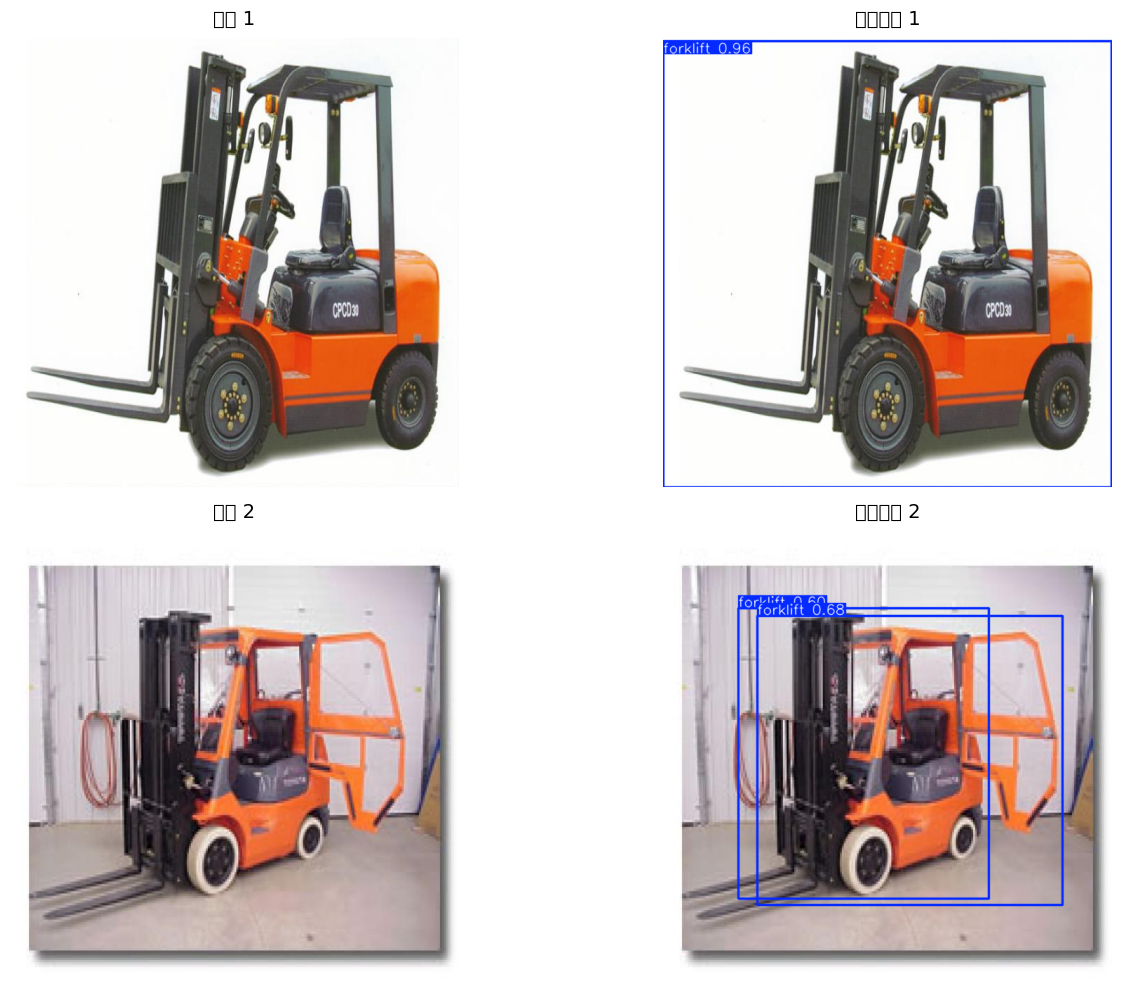

‚úÖ ÂÅµÊ∏¨ÂÆåÊàêÔºÅÁµêÊûúÂ∑≤‰øùÂ≠òÁÇ∫ detection_results.png
üöÄ ÈñãÂßã YOLO ÂèâËªäÂÅµÊ∏¨Ê∏¨Ë©¶...
‚úÖ ÊâæÂà∞Ê®°Âûã: runs/detect/forklift_detection_v2/weights/best.pt
üìÅ ÊêúÂ∞ãÁõÆÈåÑ: /content/forklift_detection/dataset/test/images
‚úÖ ÈÅ∏Âèñ‰∫Ü 2 ÂºµÊ∏¨Ë©¶ÂúñÁâá

üì∏ ÈÅ∏ÂèñÁöÑÊ∏¨Ë©¶ÂúñÁâá:
  - /content/forklift_detection/dataset/test/images/n03384352_5361_JPEG.rf.a2b4f72d8db85f897d9d26610ee854ec.jpg
  - /content/forklift_detection/dataset/test/images/Y3CQCAW80H94_jpg.rf.73da972ccda3dffd2c4b07baa4b2e229.jpg

üéØ ÈñãÂßãÂÅµÊ∏¨ (‰ø°ÂøÉÂ∫¶ÈñæÂÄº: 0.5)...

image 1/1 /content/forklift_detection/dataset/test/images/n03384352_5361_JPEG.rf.a2b4f72d8db85f897d9d26610ee854ec.jpg: 640x640 (no detections), 8.9ms
Speed: 2.3ms preprocess, 8.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/forklift_detection/dataset/test/images/Y3CQCAW80H94_jpg.rf.73da972ccda3dffd2c4b07baa4b2e229.jpg: 640x640 (no detections), 8.1ms
Speed: 3.1ms preprocess, 8.1ms inference, 0.

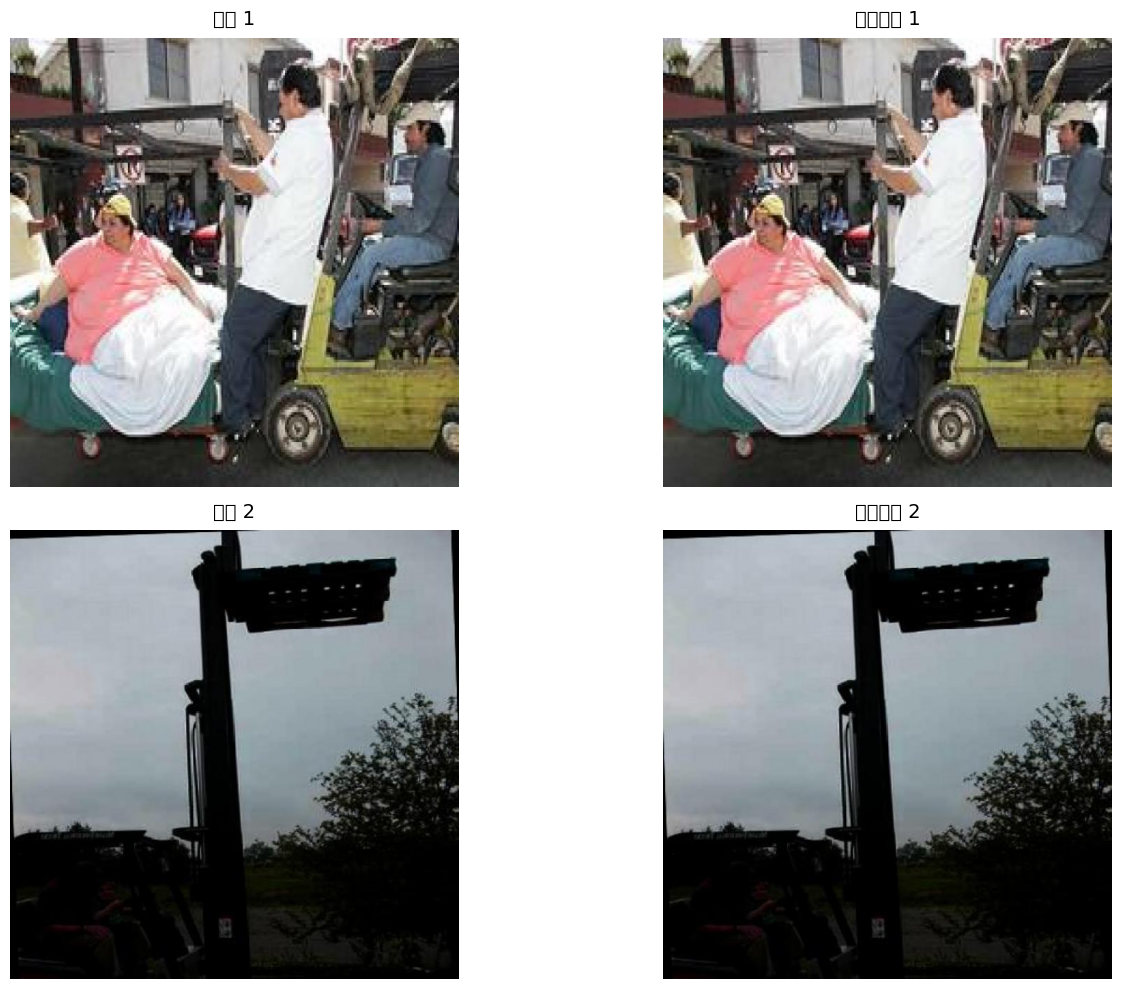


üî¨ Ê∏¨Ë©¶‰∏çÂêå‰ø°ÂøÉÂ∫¶ÈñæÂÄºÊïàÊûú...

image 1/1 /content/forklift_detection/dataset/test/images/n03384352_5361_JPEG.rf.a2b4f72d8db85f897d9d26610ee854ec.jpg: 640x640 (no detections), 10.9ms
Speed: 2.6ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/forklift_detection/dataset/test/images/n03384352_5361_JPEG.rf.a2b4f72d8db85f897d9d26610ee854ec.jpg: 640x640 (no detections), 8.8ms
Speed: 2.4ms preprocess, 8.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/forklift_detection/dataset/test/images/n03384352_5361_JPEG.rf.a2b4f72d8db85f897d9d26610ee854ec.jpg: 640x640 (no detections), 8.7ms
Speed: 2.3ms preprocess, 8.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/forklift_detection/dataset/test/images/n03384352_5361_JPEG.rf.a2b4f72d8db85f897d9d26610ee854ec.jpg: 640x640 (no detections), 11.0ms
Speed: 2.5ms preprocess, 11.0ms inference, 1.1ms postprocess p

<ipython-input-14-4fb8adeae5ee>:125: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-4fb8adeae5ee>:125: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-4fb8adeae5ee>:125: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-4fb8adeae5ee>:125: UserWarning: Glyph 38334 (\N{CJK UNIFIED IDEOGRAPH-95BE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-4fb8adeae5ee>:125: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-4fb8adeae5ee>:125: UserWarning: Glyph 20597 (\N{CJK UNIFIED IDEOGRAPH-5075}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-14-4fb8adeae5ee>:125: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missi

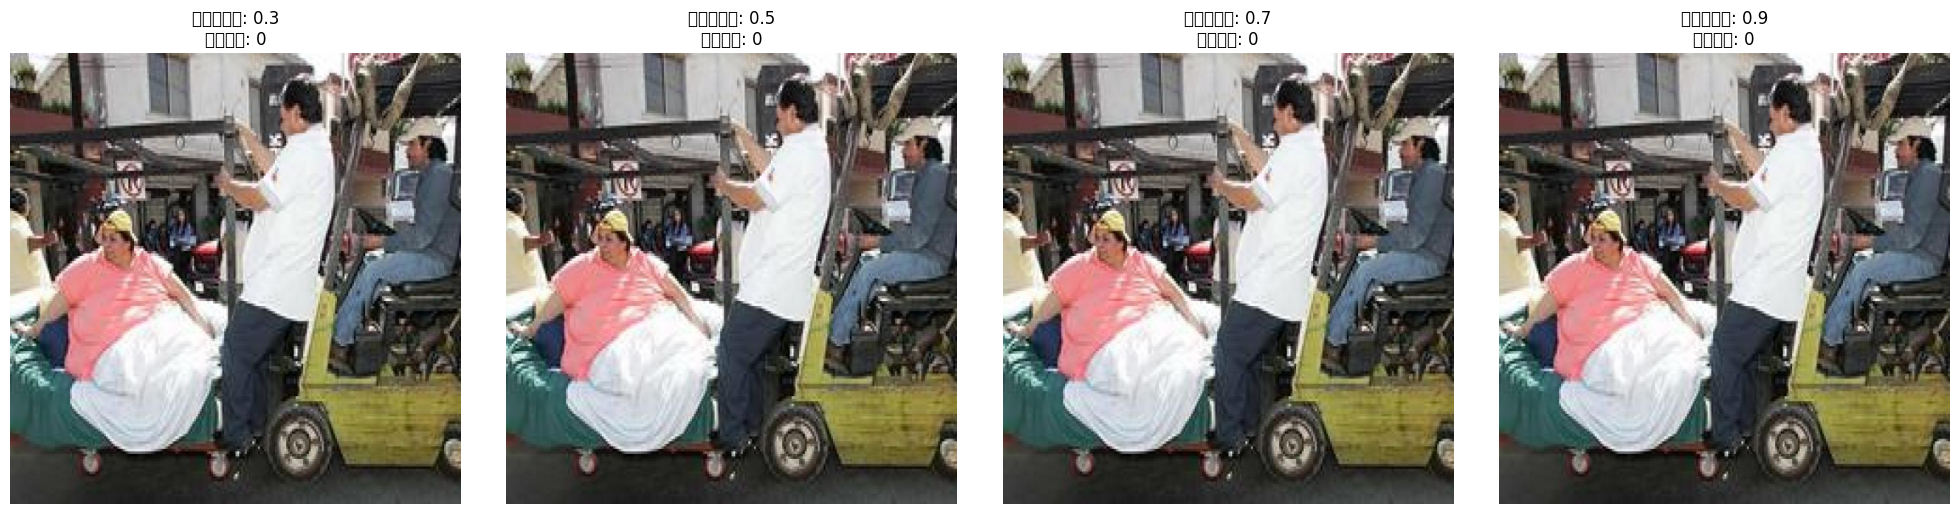

‚úÖ Ê∏¨Ë©¶ÂÆåÊàêÔºÅ
üìÅ ÁµêÊûúÂ∑≤‰øùÂ≠òÁÇ∫:
  - detection_results.png (ÂÅµÊ∏¨ÁµêÊûú)
  - threshold_comparison.png (ÈñæÂÄºÊØîËºÉ)


In [14]:
#!/usr/bin/env python3
"""
YOLO v8 Â†ÜÈ´òÊ©üÂÅµÊ∏¨Ê∏¨Ë©¶ËÖ≥Êú¨
‰ΩøÁî®Ë®ìÁ∑¥Â•ΩÁöÑÊ®°ÂûãÂ∞çÊ∏¨Ë©¶ÂúñÁâáÈÄ≤Ë°åÂÅµÊ∏¨
"""

import os
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

def find_test_images(test_dir='content/forklift_detection/dataset/test/images', num_images=2):
    """ÂæûÊ∏¨Ë©¶Ë≥áÊñôÂ§æ‰∏≠Èö®Ê©üÈÅ∏ÂèñÂúñÁâá"""

    # ÂèØËÉΩÁöÑÊ∏¨Ë©¶ÂúñÁâáË∑ØÂæë
    possible_dirs = [
        'content/forklift_detection/dataset/test/images',
        '/content/forklift_detection/dataset/test/images',
        './content/forklift_detection/dataset/test/images',
        'content/forklift_detection/dataset/train/images'  # Â¶ÇÊûútestÊ≤íÊúâÂúñÁâáÔºåÁî®trainÁöÑ
    ]

    test_images = []

    for test_dir in possible_dirs:
        if os.path.exists(test_dir):
            print(f"üìÅ ÊêúÂ∞ãÁõÆÈåÑ: {test_dir}")

            # Áç≤ÂèñÊâÄÊúâÂúñÁâáÊñá‰ª∂
            image_files = [f for f in os.listdir(test_dir)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

            if len(image_files) >= num_images:
                # Èö®Ê©üÈÅ∏ÂèñÊåáÂÆöÊï∏ÈáèÁöÑÂúñÁâá
                selected = random.sample(image_files, num_images)
                test_images = [os.path.join(test_dir, img) for img in selected]
                print(f"‚úÖ ÈÅ∏Âèñ‰∫Ü {len(test_images)} ÂºµÊ∏¨Ë©¶ÂúñÁâá")
                break

    if not test_images:
        print("‚ùå Êâæ‰∏çÂà∞Ê∏¨Ë©¶ÂúñÁâá")
        return None

    return test_images

def load_model(model_path='runs/detect/forklift_detection_v2/weights/best.pt'):
    """ËºâÂÖ•Ë®ìÁ∑¥Â•ΩÁöÑÊ®°Âûã"""

    # Ê™¢Êü•Ê®°ÂûãÊòØÂê¶Â≠òÂú®
    possible_paths = [
        'runs/detect/forklift_detection_v2/weights/best.pt',
        '/content/forklift_detection/runs/detect/forklift_detection_v2/weights/best.pt',
        'runs/detect/forklift_detection/weights/best.pt',
        '/content/forklift_detection/runs/detect/forklift_detection/weights/best.pt'
    ]

    for path in possible_paths:
        if os.path.exists(path):
            print(f"‚úÖ ÊâæÂà∞Ê®°Âûã: {path}")
            model = YOLO(path)
            return model

    print("‚ùå Êâæ‰∏çÂà∞Ê®°ÂûãÊñá‰ª∂")
    return None

def detect_and_display(model, image_paths, conf_threshold=0.5):
    """Â∞çÂúñÁâáÈÄ≤Ë°åÂÅµÊ∏¨‰∏¶È°ØÁ§∫ÁµêÊûú - Á∞°ÊΩîÁâàÊú¨"""

    plt.figure(figsize=(15, 10))

    for idx, image_path in enumerate(image_paths):
        # ËÆÄÂèñÂéüÂßãÂúñÁâá
        original_img = cv2.imread(image_path)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

        # ÈÄ≤Ë°åÂÅµÊ∏¨
        results = model(image_path, conf=conf_threshold)
        result = results[0]

        # Áπ™Ë£ΩÂÅµÊ∏¨ÁµêÊûú
        detected_img = result.plot()  # YOLOÂÖßÂª∫ÁöÑÁπ™ÂúñÂäüËÉΩ
        detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

        # È°ØÁ§∫ÂéüÂúñ
        plt.subplot(2, 2, idx*2 + 1)
        plt.imshow(original_img)
        plt.title(f'ÂéüÂúñ {idx+1}', fontsize=14, pad=10)
        plt.axis('off')

        # È°ØÁ§∫ÂÅµÊ∏¨ÁµêÊûú
        plt.subplot(2, 2, idx*2 + 2)
        plt.imshow(detected_img)
        plt.title(f'ÂÅµÊ∏¨ÁµêÊûú {idx+1}', fontsize=14, pad=10)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('detection_results.png', dpi=300, bbox_inches='tight')
    plt.show()

def test_different_thresholds(model, image_path):
    """Ê∏¨Ë©¶‰∏çÂêå‰ø°ÂøÉÂ∫¶ÈñæÂÄºÁöÑÂÅµÊ∏¨ÊïàÊûú"""

    thresholds = [0.3, 0.5, 0.7, 0.9]

    plt.figure(figsize=(20, 5))

    for idx, threshold in enumerate(thresholds):
        results = model(image_path, conf=threshold)
        result = results[0]
        detected_img = result.plot()
        detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 4, idx + 1)
        plt.imshow(detected_img)

        boxes = result.boxes
        num_detections = len(boxes) if boxes is not None else 0

        plt.title(f'‰ø°ÂøÉÂ∫¶ÈñæÂÄº: {threshold}\nÂÅµÊ∏¨Êï∏Èáè: {num_detections}', fontsize=12)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('threshold_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

def main():
    print("üöÄ ÈñãÂßã YOLO ÂèâËªäÂÅµÊ∏¨Ê∏¨Ë©¶...")

    # ËºâÂÖ•Ê®°Âûã
    model = load_model()
    if not model:
        return

    # ÊâæÊ∏¨Ë©¶ÂúñÁâá
    test_images = find_test_images(num_images=2)
    if not test_images:
        return

    # ÂÅµÊ∏¨‰∏¶È°ØÁ§∫ÁµêÊûú - ÂÉÖÈ°ØÁ§∫Ë¶ñË¶∫ÁµêÊûú
    detect_and_display(model, test_images, conf_threshold=0.5)

    print("‚úÖ ÂÅµÊ∏¨ÂÆåÊàêÔºÅÁµêÊûúÂ∑≤‰øùÂ≠òÁÇ∫ detection_results.png")
    print("üöÄ ÈñãÂßã YOLO ÂèâËªäÂÅµÊ∏¨Ê∏¨Ë©¶...")

    # ËºâÂÖ•Ê®°Âûã
    model = load_model()
    if not model:
        return

    # ÊâæÊ∏¨Ë©¶ÂúñÁâá
    test_images = find_test_images(num_images=2)
    if not test_images:
        return

    print(f"\nüì∏ ÈÅ∏ÂèñÁöÑÊ∏¨Ë©¶ÂúñÁâá:")
    for img in test_images:
        print(f"  - {img}")

    # ÂÅµÊ∏¨‰∏¶È°ØÁ§∫ÁµêÊûú
    print(f"\nüéØ ÈñãÂßãÂÅµÊ∏¨ (‰ø°ÂøÉÂ∫¶ÈñæÂÄº: 0.5)...")
    detect_and_display(model, test_images, conf_threshold=0.5)

    # Ê∏¨Ë©¶‰∏çÂêåÈñæÂÄº (‰ΩøÁî®Á¨¨‰∏ÄÂºµÂúñÁâá)
    if len(test_images) > 0:
        print(f"\nüî¨ Ê∏¨Ë©¶‰∏çÂêå‰ø°ÂøÉÂ∫¶ÈñæÂÄºÊïàÊûú...")
        test_different_thresholds(model, test_images[0])

    print("‚úÖ Ê∏¨Ë©¶ÂÆåÊàêÔºÅ")
    print("üìÅ ÁµêÊûúÂ∑≤‰øùÂ≠òÁÇ∫:")
    print("  - detection_results.png (ÂÅµÊ∏¨ÁµêÊûú)")
    print("  - threshold_comparison.png (ÈñæÂÄºÊØîËºÉ)")

if __name__ == "__main__":
    main()